In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("cyberbullying_tweets.csv")

In [3]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
df.shape

(47692, 2)

/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


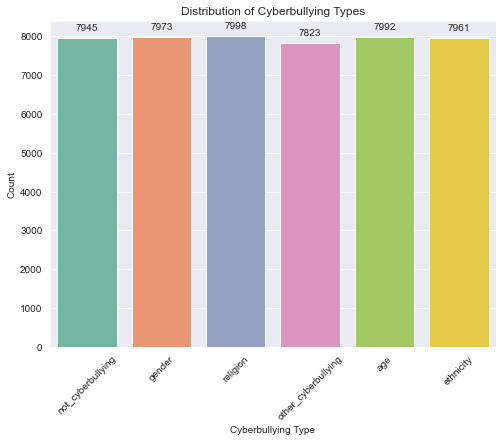

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(df["cyberbullying_type"], palette="Set2")
ax.set_title("Distribution of Cyberbullying Types")
ax.set_xlabel("Cyberbullying Type")
ax.set_ylabel("Count")
plt.xticks(rotation=45)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Define pre-processing function
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove mentions and hashtags
    tweet = re.sub(r"@[^\s]+|#[^\s]+", "", tweet)
    
    # Remove non-alphabetic characters
    tweet = re.sub(r"[^a-zA-Z]", " ", tweet)
    
    # Tokenize the tweet
    tokens = nltk.word_tokenize(tweet)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the lemmatized tokens back into a string
    clean_tweet = " ".join(lemmatized_tokens)
    
    return clean_tweet

# Apply pre-processing to the "tweet_text" column and create a new column "clean_text"
df["clean_text"] = df["tweet_text"].apply(preprocess_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/devansh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df.sample(15)

,tweet_text,cyberbullying_type,clean_text
31942,An Indian student bullied for her beliefs at t...,age,indian student bullied belief world expensive ...
18823,U @UN @UNHumanRights @POTUS r murderer of This...,religion,u r murderer pakistani minority becoz isolatin...
39366,It’s really bad. He’s the like school bully yo...,age,really bad like school bully ignore also super...
7674,@Moccochang Você sofre bullying? Acho que sim ...,not_cyberbullying,voc sofre bullying acho que sim n vai fazer al...
4915,Intelligence &amp; class,not_cyberbullying,intelligence amp class
25485,@ChrisWarcraft lol. I haven't watched tonight'...,other_cyberbullying,lol watched tonight ep yet put
29167,I have no intent on linking to the articles wh...,other_cyberbullying,intent linking article stated backing attempt ...
38386,Saw a photo from an old bully from high school...,age,saw photo old bully high school prison guard c...
19736,There is surge in islamic terrorism during ram...,religion,surge islamic terrorism ramdan across world u ...
35944,Goddess Jenni is that Goddess that bullied me ...,age,goddess jenni goddess bullied high school ador...


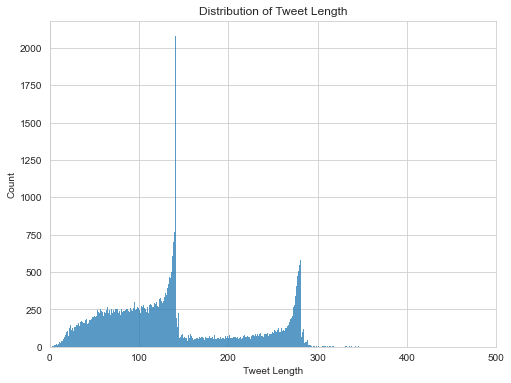

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column with the length of each tweet
df['tweet_length'] = df['tweet_text'].apply(lambda x: len(x))

# Set the style of the plot
sns.set_style('whitegrid')

# Create the histogram using seaborn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tweet_length', binwidth=1, kde=False)

# Add labels and title to the plot
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.xlim(0, 500)

# Display the plot
plt.show()


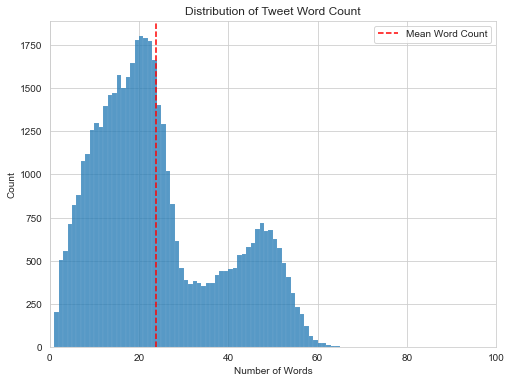

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column with the word count of each tweet
df['tweet_word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

# Calculate the mean word count
mean_word_count = df['tweet_word_count'].mean()

# Set the style of the plot
sns.set_style('whitegrid')

# Create the histogram using seaborn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tweet_word_count', binwidth=1, kde=False)

# Add a vertical line for the mean value
plt.axvline(mean_word_count, color='r', linestyle='--', label='Mean Word Count')

# Add labels and title to the plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.legend()
plt.xlim(0, 100)

# Display the plot
plt.show()


In [10]:
df

,tweet_text,cyberbullying_type,clean_text,tweet_length,tweet_word_count
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious,61,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white,115,14
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,60,9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks head concerned another angry dude...,103,18
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,103,18
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...,234,42
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,276,45
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,104,20
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt youre nigger fucking unfollow fuck...,90,15


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["cyberbullying_type"]=encoder.fit_transform(df["cyberbullying_type"])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
X = df["clean_text"]
y= df["cyberbullying_type"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform training data
X_train = vectorizer.fit_transform(X_train)

# Transform testing data
X_test = vectorizer.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict labels for testing data
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8103574798196876


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate hash vectorizer
hash_vectorizer = HashingVectorizer(n_features=10000)

# Fit and transform training data
X_train = hash_vectorizer.fit_transform(X_train)

# Transform testing data
X_test = hash_vectorizer.transform(X_test)

# Generate LSA model
lsa = TruncatedSVD(n_components=300)
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_lsa, y_train)

# Predict labels for testing data
y_pred = clf.predict(X_test_lsa)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7989307055246881


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate hash vectorizer
hash_vectorizer = HashingVectorizer(n_features=10000)

# Fit and transform training data
X_train = hash_vectorizer.fit_transform(X_train)

# Transform testing data
X_test = hash_vectorizer.transform(X_test)

# Generate LSA model
lsa = TruncatedSVD(n_components=300)
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

# Train support vector machine classifier
clf = LinearSVC()
clf.fit(X_train_lsa, y_train)

# Predict labels for testing data
y_pred = clf.predict(X_test_lsa)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.797567879232624


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform training data
X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
X_test = tfidf_vectorizer.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test Random Forest model
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Test XGBoost model
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_acc)

# Train CatBoost model
cat_model = CatBoostClassifier(n_estimators=100, random_state=42)
cat_model.fit(X_train, y_train)

# Test CatBoost model
cat_pred = cat_model.predict(X_test)
cat_acc = accuracy_score(y_test, cat_pred)
print("CatBoost Accuracy:", cat_acc)


Random Forest Accuracy: 0.804067512317853
XGBoost Accuracy: 0.8201069294475312
Learning rate set to 0.5
0:	learn: 1.0159011	total: 452ms	remaining: 44.7s
1:	learn: 0.8567107	total: 725ms	remaining: 35.5s
2:	learn: 0.7545833	total: 1s	remaining: 32.4s
3:	learn: 0.6909423	total: 1.28s	remaining: 30.7s
4:	learn: 0.6542707	total: 1.58s	remaining: 30s
5:	learn: 0.6275381	total: 1.84s	remaining: 28.9s
6:	learn: 0.6018897	total: 2.12s	remaining: 28.1s
7:	learn: 0.5843864	total: 2.38s	remaining: 27.4s
8:	learn: 0.5693126	total: 2.65s	remaining: 26.8s
9:	learn: 0.5555296	total: 2.92s	remaining: 26.3s
10:	learn: 0.5474431	total: 3.19s	remaining: 25.8s
11:	learn: 0.5436707	total: 3.45s	remaining: 25.3s
12:	learn: 0.5362520	total: 3.71s	remaining: 24.9s
13:	learn: 0.5267562	total: 3.98s	remaining: 24.5s
14:	learn: 0.5220545	total: 4.25s	remaining: 24.1s
15:	learn: 0.5190768	total: 4.51s	remaining: 23.7s
16:	learn: 0.5139881	total: 4.78s	remaining: 23.3s
17:	learn: 0.5115534	total: 5.05s	remaining:

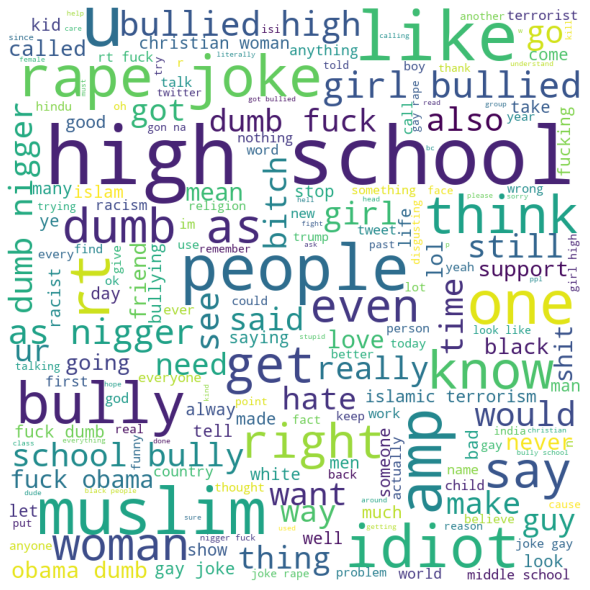

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['clean_text']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using HashingVectorizer
vectorizer = HashingVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Apply LSA
lsa = TruncatedSVD(n_components=100, algorithm='arpack')
X_train_lsa = lsa.fit_transform(X_train_vectorized)
X_test_lsa = lsa.transform(X_test_vectorized)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_lsa, y_train)
rf_pred = rf.predict(X_test_lsa)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy: ", rf_accuracy)

# Train XGBoost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_lsa, y_train)
xgb_pred = xgb.predict(X_test_lsa)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: ", xgb_accuracy)

# Train CatBoost classifier
cat = CatBoostClassifier(random_state=42, verbose=False)
cat.fit(X_train_lsa, y_train)
cat_pred = cat.predict(X_test_lsa)
cat_accuracy = accuracy_score(y_test, cat_pred)
print("CatBoost Accuracy: ", cat_accuracy)


Random Forest Accuracy:  0.7732466715588636
XGBoost Accuracy:  0.7799559702274872
CatBoost Accuracy:  0.7914875773141838
